In [70]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

# pip install scikit-image
# pip install tensorflow
print("success")

success


In [49]:
dataset="C:/Users/Asode/Documents/DS 4400/Vegetable Images"

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")
validation_folder = os.path.join(dataset,"validation")
print(test_folder)

C:/Users/Asode/Documents/DS 4400/Vegetable Images\test


In [3]:
def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + 
                  str(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])) + 
                  " files in " + str(path.name))
 
count_files(test_folder)

There are 200 files in Bean
There are 200 files in Bitter_Gourd
There are 200 files in Bottle_Gourd
There are 200 files in Brinjal
There are 200 files in Broccoli
There are 200 files in Cabbage
There are 200 files in Capsicum
There are 200 files in Carrot
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Papaya
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Radish
There are 200 files in Tomato


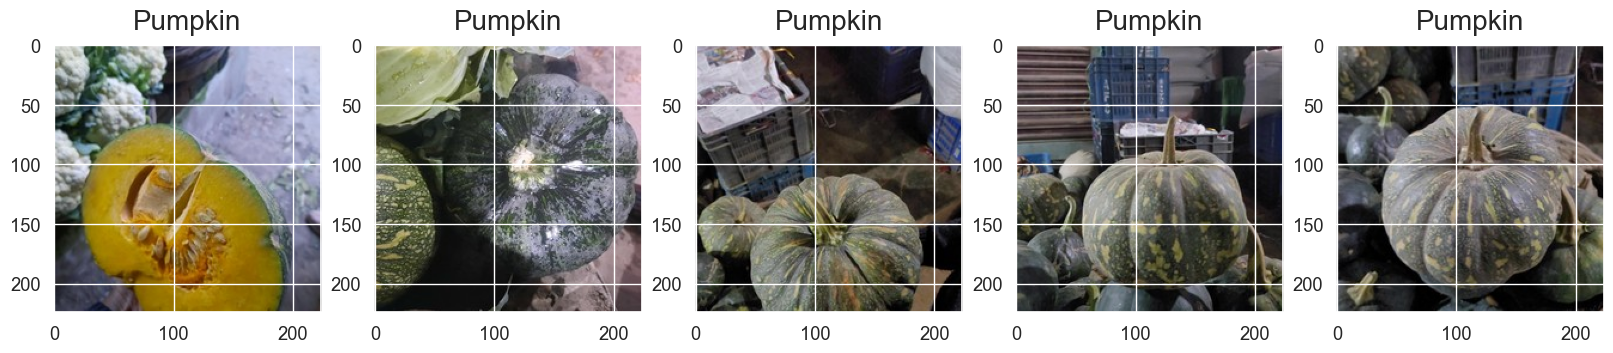

In [165]:
select_vegetable="Pumpkin"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

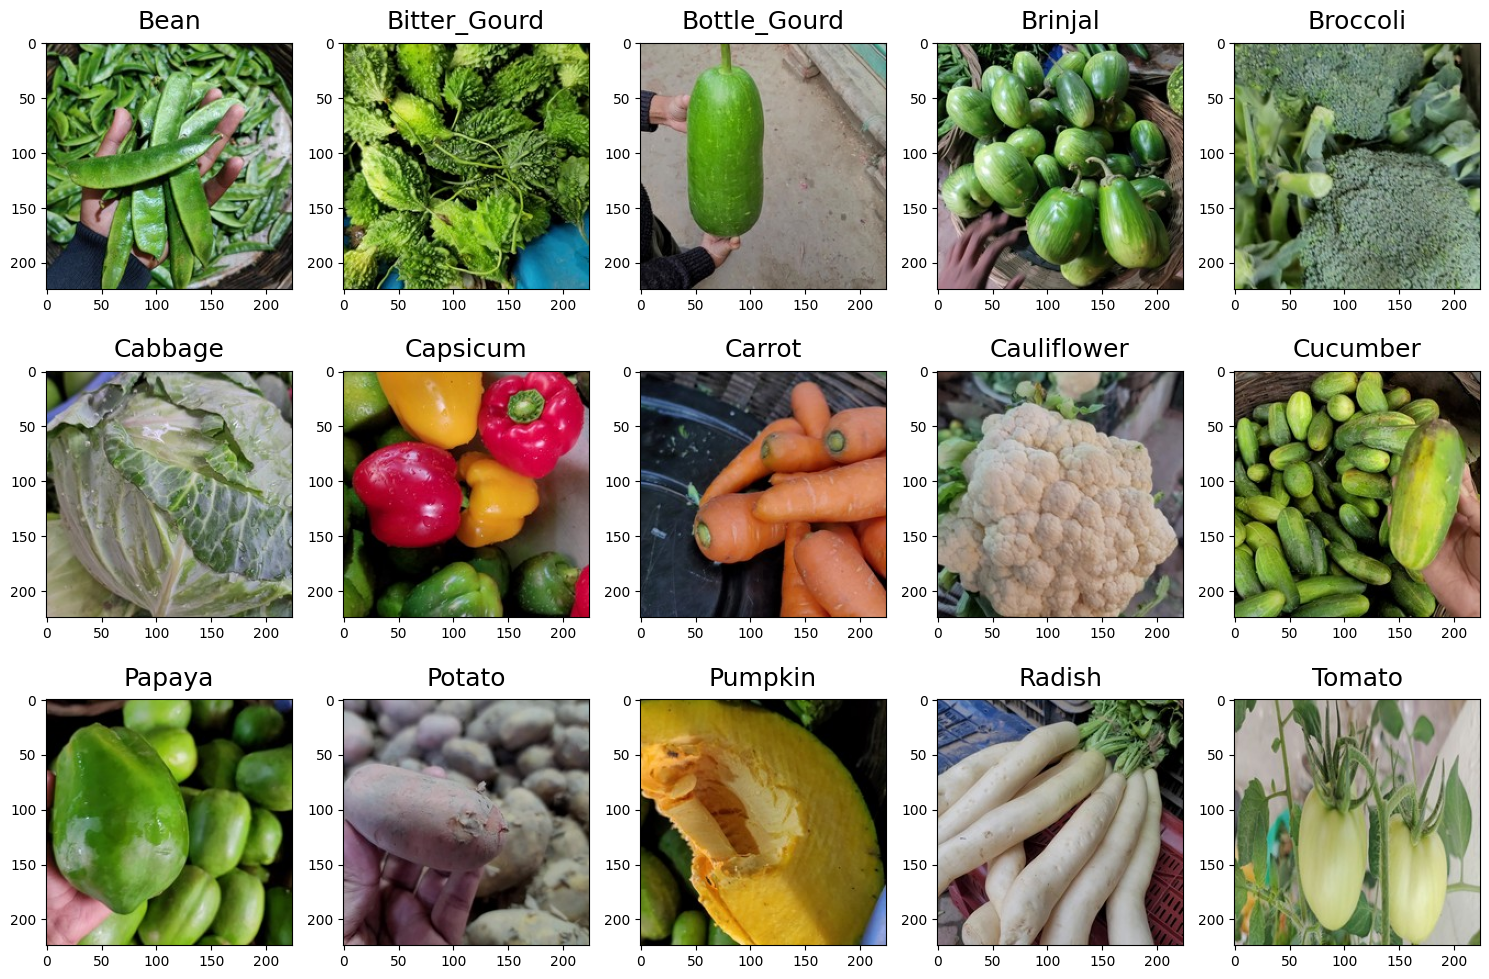

In [15]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    veggies=image_.split("\\")[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(veggies, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [49]:
"""commented out for model training
IMAGE_SIZE = [224, 224]

# Using inception model from Google
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Only want to add knew layers and keep previously trained layers
for layer in inception.layers:
    layer.trainable = False

# Our newly added layers
# Adding GlobalAveragePooling2D to reduce dimensions of output layer through averages of inceptions output
# Dense adds a fully connected layer that will tailor to our vegetable datset with relu activation
# Adding dropout to prevent overfitting
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

# Found that 15 adding 15 nodes provides best results through long test );
prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
"""

87910968/87910968 [==============================] - 10s 0us/step


In [16]:
# Setting up data generators for loading and augmenting image data for use in training and testing

train_data = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_data = image.ImageDataGenerator(rescale = 1./255)

training_set = train_data.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_data.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 64, 
    class_mode = 'categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [52]:
"""commented out to avoid rerunning model
# Fitting the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
""""""

Epoch 1/5
235/235 [==============================] - 1605s 7s/step - loss: 0.2894 - accuracy: 0.9106 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 2/5
235/235 [==============================] - 1214s 5s/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.0275 - val_accuracy: 0.9947
Epoch 3/5
235/235 [==============================] - 1073s 5s/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0293 - val_accuracy: 0.9923
Epoch 4/5
235/235 [==============================] - 1086s 5s/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0312 - val_accuracy: 0.9893
Epoch 5/5
235/235 [==============================] - 2948s 13s/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0192 - val_accuracy: 0.9937


In [ ]:
#model.save('model_inceptionV3_epoch5.h5')

In [42]:
# Creating the linegraphs of the accuracy of the model
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
#plot_accuracy(r)
#plot_loss(r)

In [43]:
# load the model
K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model doo do do doo ..")
model = load_model(path_to_model)
print("Model is loaded :)")

Loading the model..
Done!


In [162]:
# test the model

validation_data = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_data.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.
Test Accuracy: 0.992


In [170]:
veggies={
    0: 'Bean', 
    1: 'Bitter_Gourd', 
    2: 'Bottle_Gourd', 
    3: 'Brinjal', 
    4: 'Broccoli', 
    5: 'Cabbage', 
    6: 'Capsicum', 
    7: 'Carrot', 
    8: 'Cauliflower',
    9: 'Cucumber', 
    10: 'Papaya', 
    11: 'Potato', 
    12: 'Pumpkin', 
    13: 'Radish', 
    14: 'Tomato'
}


# predicts a single image and plots it on a graph
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
     
    plt.title("Our model's prediction is a {}".format(veggies[index]))
    return img_array
    
    
# predicts a folder of veggie images and finds accuracy
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    # repoeated code because of accessing files
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=veggies.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 0s 179ms/step


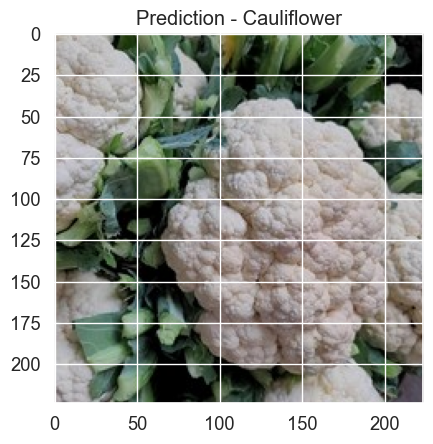

In [87]:
# predicting a normal validation image

image_path = 'Cauliflower/1264.jpg'

plt.imshow(predict_image(os.path.join(validation_folder, image_path),model))

1/1 [==============================] - 0s 177ms/step


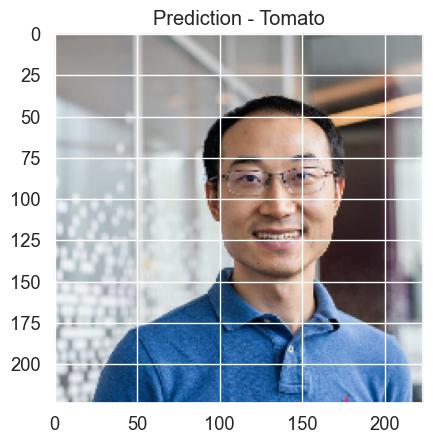

In [88]:
# Look you're a tomato!

image_path = "hongyang_website.jpg"
vegetables = "C:/Users/Asode/Documents/DS 4400/vegetables/our-images"
plt.imshow(predict_image(os.path.join(vegetables, image_path),model))

In [68]:
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

1/1 [==============================] - 0s 149ms/step
Accuracy for Vegetable Images\test\Bean: 0.00 (0/200)
1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 134ms/step
Accuracy for Vegetable Images\test\Bitter_Gourd: 0.00 (0/200)
1/1 [==============================] - 0s 122ms/step
Accuracy for Vegetable Images\test\Bottle_Gourd: 0.00 (0/200)
1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 129ms/step
Accuracy for Vegetable Images\test\Brinjal: 0.00 (0/200)
1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 160ms/step
Accuracy for Vegetable Images\test\Broccoli: 0.00 (0/200)
1/1 [==============================] - 0s 163ms/step
Accuracy for Vegetable Images\test\Cabbage: 0.00 (0/200)
1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 145ms/step
Accuracy for Vegetable Images\test\Capsicum: 0.00 (0/200)
1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 156ms/step
Accuracy for Vegetable Images\test\Carrot: 0.00 (0/200)
1/1 [==============================] - 0s 166ms/step
Accuracy for Vegetable Images\test\Cauliflower: 0.00 (0/200)
1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 181ms/step
Accuracy for Vegetable Images\test\Cucumber: 0.00 (0/200)
1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 175ms/step
Accuracy for Vegetable Images\test\Papaya: 0.00 (0/200)
1/1 [==============================] - 0s 186ms/step
Accuracy for Vegetable Images\test\Potato: 0.00 (0/200)
1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 181ms/step
Accuracy for Vegetable Images\test\Pumpkin: 0.00 (0/200)
1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 195ms/step
Accuracy for Vegetable Images\test\Radish: 0.00 (0/200)
1/1 [==============================] - 0s 212ms/step
Accuracy for Vegetable Images\test\Tomato: 0.00 (0/200)


In [166]:
# confusion matrix

def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=mapping[i]
        print(true)
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = veggies[keys]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [171]:
print(validation_folder)
#y_true,y_pred=labels_confusion_matrix(validation_folder)
print_confusion_matrix(y_true,y_pred)

C:/Users/Asode/Documents/DS 4400/Vegetable Images\validation


NameError: name 'keys' is not defined

1/1 [==============================] - 0s 232ms/step


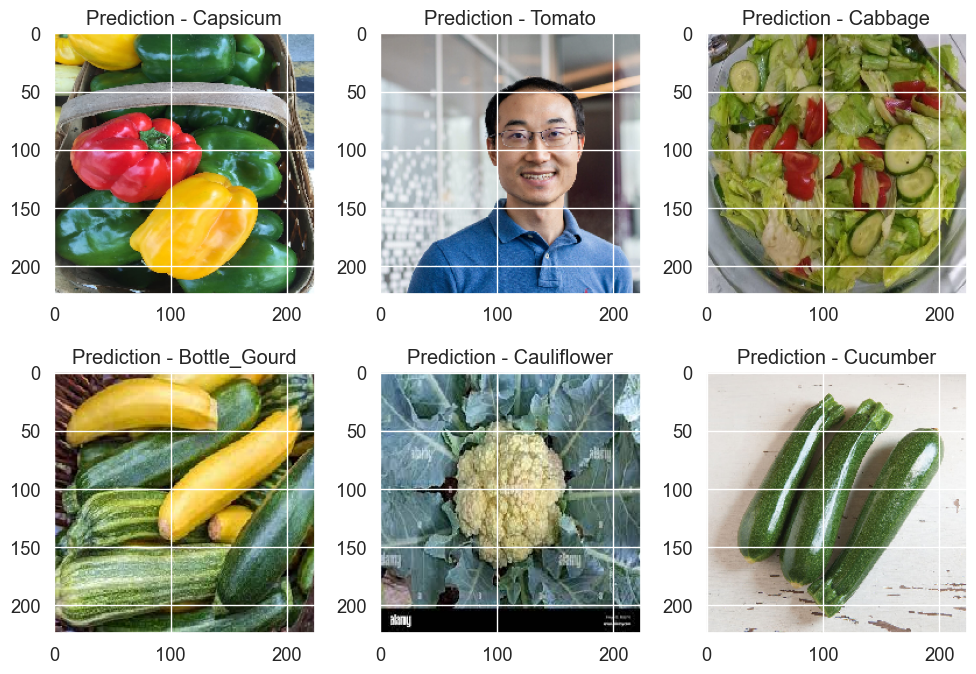

In [161]:
images = []

our_images="C:/Users/Asode/Documents/DS 4400/vegetables/our-images"  

subplot = 0
fig = plt.figure(figsize = (10,7))
rows = 2
columns = 3

for image_str in sorted(os.listdir(our_images)):
    subplot = subplot + 1
    fig.add_subplot(rows, columns, subplot)
    prediction = predict_image(os.path.join(our_images, image_str), model)
    plt.imshow(prediction)

plt.tight_layout()